# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fanalysis.mca import MCA
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import scipy

# Utilisation du module functions

In [2]:
from mlops_functions import functions
from mlops_functions import stats

# Lecture de données

In [3]:
from mlops_functions.functions import load_data

# Louise
#base = functions.load_data("//ad.univ-lille.fr/Etudiants/Homedir3/147794/Documents/M2/Rendu_MLOPS/athlete_events.csv")
base = functions.load_data("/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/athlete_events.csv")



# Cyrielle
#base = functions.load_data("/Users/Cyrie/OneDrive/Bureau/M2_DS/S1/MLOPS/Rendu_MLOPS/athlete_events.csv")


# Filtre sur Summer

In [4]:
from mlops_functions.functions import filter_summer_season
# Filtre sur la saison d'été
base_summer = functions.filter_summer_season(base)


# Valeurs manquantes et abbérantes du df base_summer

In [5]:
#valeurs manquantes pour le df base summer
valeurs_manquantes_par_variable1 = base_summer.isnull().sum()

# Affichage du résultat pour le df base summer
print(valeurs_manquantes_par_variable1)

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64


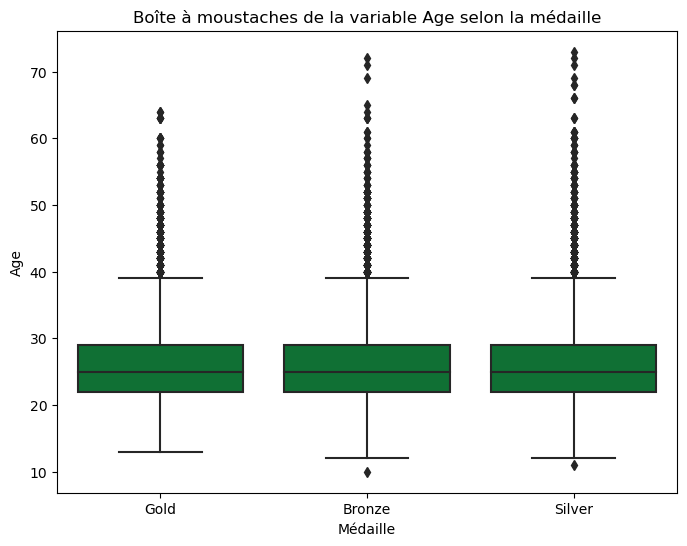

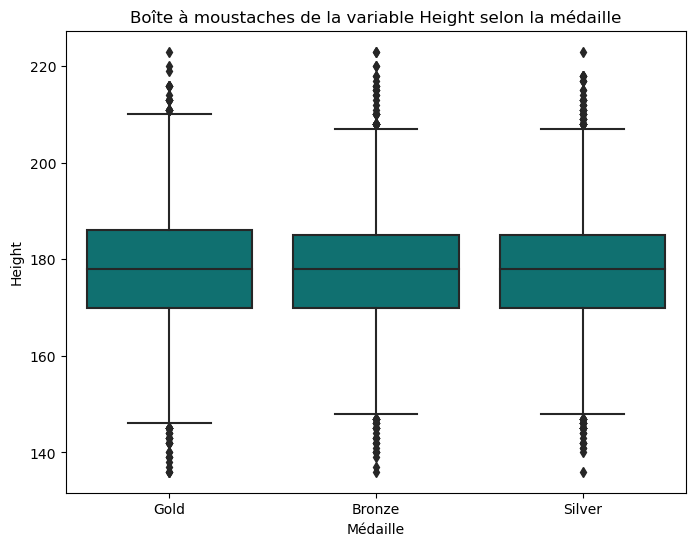

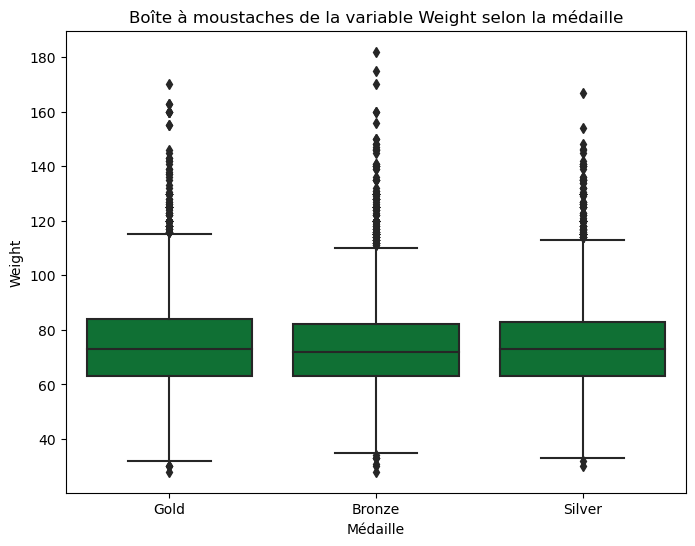

In [7]:
from mlops_functions.stats import plot_boxplot_medal_vs_numeric_variable
#valeur abbérentes

plot_boxplot_medal_vs_numeric_variable(base_summer, 'Age', color='#008030')
plot_boxplot_medal_vs_numeric_variable(base_summer, 'Height', color='#008080')
plot_boxplot_medal_vs_numeric_variable(base_summer, 'Weight', color='#008030')

In [6]:
#lecture des valeurs abbérantes
# Filtre sur les enregistrements où l'âge est supérieur à 40 et inférieur à 11 ans
base_summer_age_11_40 = base_summer[(base_summer['Age'] > 40) | (base_summer['Age'] < 11)]
print("DataFrame pour l'âge entre 11 et 40 ans inclus:")
print(base_summer_age_11_40)

# Filtre sur les enregistrements où la taille est inférieure à 145 cm et supérieure à 210 cm
base_summer_height_145_210 = base_summer[(base_summer['Height'] > 210) | (base_summer['Height'] < 145)]
print("\nDataFrame pour la taille entre 145 et 210 cm inclus:")
print(base_summer_height_145_210)

# Filtre sur les enregistrements où le poids est inférieur à 35 kg et supérieur à 118 kg
base_summer_weight_35_118 = base_summer[(base_summer['Weight'] > 118) | (base_summer['Weight'] < 35)]
print("\nDataFrame pour le poids entre 35 et 118 kg inclus:")
print(base_summer_weight_35_118)


DataFrame pour l'âge entre 11 et 40 ans inclus:
            ID                                       Name Sex   Age  Height  \
58          19                      Win Valdemar Aaltonen   M  54.0     NaN   
89          28                           Jan-Erik Aarberg   M  43.0   170.0   
90          28                           Jan-Erik Aarberg   M  47.0   170.0   
124         45                                Hakon Aasns   M  41.0     NaN   
126         46                                 Hans Aasns   M  45.0   194.0   
...        ...                                        ...  ..   ...     ...   
270752  135406                              Bla Zulawszky   M  42.0     NaN   
270753  135406                              Bla Zulawszky   M  42.0     NaN   
270955  135494                               Jacek uawski   M  41.0     NaN   
270971  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  43.0   183.0   
270972  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  47.0   183.0   

   

# Regroupements

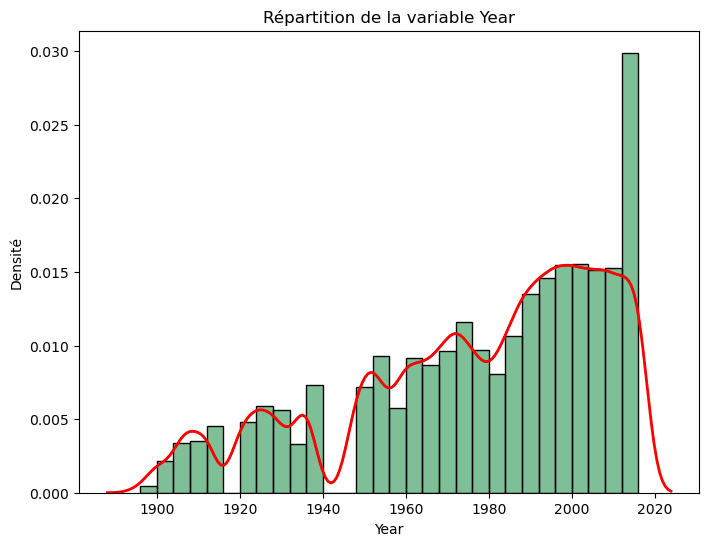

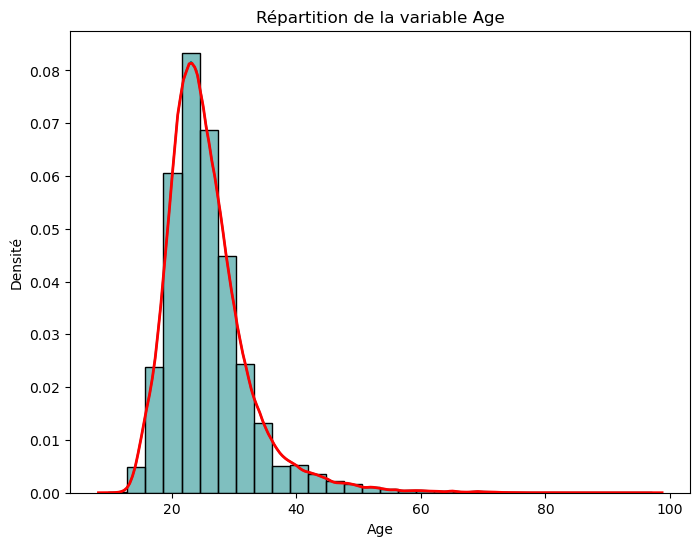

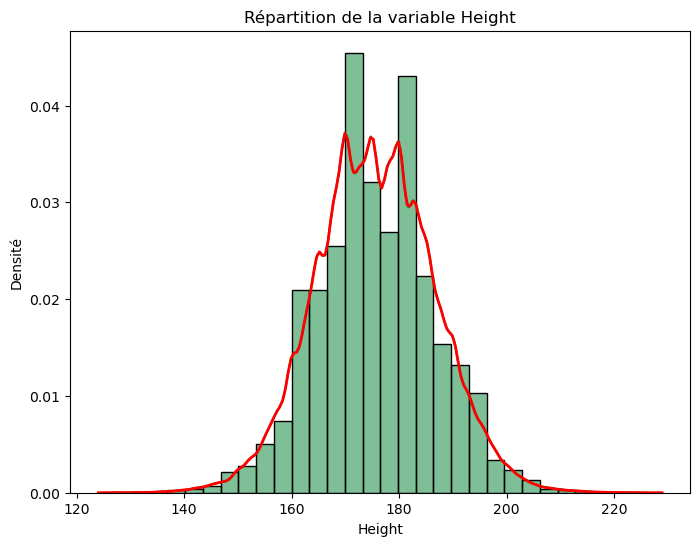

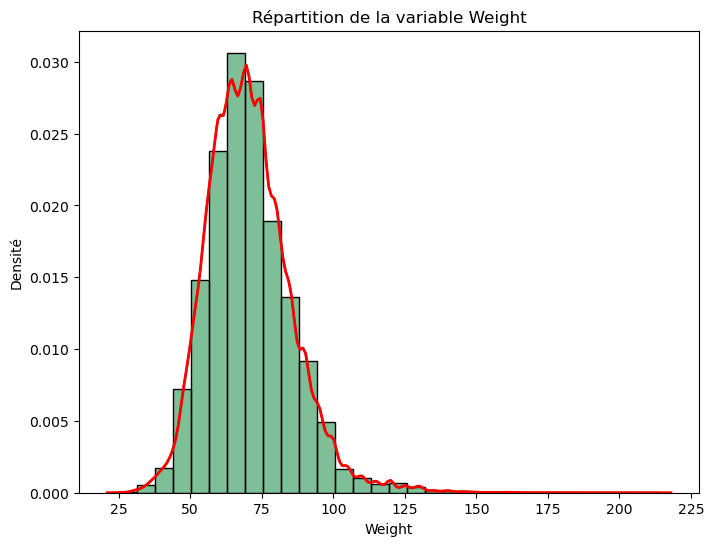

In [9]:
from mlops_functions.stats import plot_distribution_numeric_variable

plot_distribution_numeric_variable(base_summer, 'Year', color='#008030')
plot_distribution_numeric_variable(base_summer, 'Age', color='#008080')
plot_distribution_numeric_variable(base_summer, 'Height', color='#008030')
plot_distribution_numeric_variable(base_summer, 'Weight', color='#008030')

In [7]:
from mlops_functions.functions import create_age_classes, create_height_classes, create_weight_classes

# Création des classes d'âge
age_classes = create_age_classes(base_summer)
print(age_classes.head(5))

# Création des classes de taille
height_classes = create_height_classes(base_summer)
print(height_classes.head(5))

# Création des classes de poids
weight_classes = create_weight_classes(base_summer)
print(weight_classes.head(70))

     Age   Classe_age
0   24.0  21 - 24 ans
1   23.0  21 - 24 ans
2   24.0  21 - 24 ans
3   34.0     > 32 ans
26  18.0     < 21 ans
    Height Classe_height
0    180.0  173 - 185 cm
1    170.0  165 - 172 cm
2      NaN           NaN
3      NaN           NaN
26   168.0  165 - 172 cm
     Weight Classe_weight
0      80.0    74 - 80 kg
1      60.0       < 65 kg
2       NaN           NaN
3       NaN           NaN
26      NaN           NaN
..      ...           ...
127    93.0       > 80 kg
128    93.0       > 80 kg
129    93.0       > 80 kg
130    74.0    74 - 80 kg
131    74.0    74 - 80 kg

[70 rows x 2 columns]


/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/mlops_functions/functions.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classe_age'] = pd.cut(df['Age'], bins=intervalles, labels=labels, right=False)
/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/mlops_functions/functions.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classe_age'] = df['Classe_age'].astype('category')
/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/mlops_functions/functions.py:78: SettingWithCopyWarning: 
A value 

In [8]:
#afficher les frequences de modalites pour les variables regroupes
###################AGE#####################
print("Fréquences de modalités pour la Classe âge:")
print(base_summer['Classe_age'].value_counts())

###################HEIGHT#####################
print("\nFréquences de modalités pour la Classe taille:")
print(base_summer['Classe_height'].value_counts())

###################WEIGHT#####################
print("\nFréquences de modalités pour la Classe poids:")
print(base_summer['Classe_weight'].value_counts())


#fonction pour afficher les fréquences en pourcentage
def print_percentage_counts(column_name):
    percentages = base_summer[column_name].value_counts(normalize=True) * 100
    print(f"Fréquences en pourcentage pour la colonne '{column_name}':")
    print(percentages)

# Afficher les fréquences en pourcentage pour la classe d'âge
print_percentage_counts('Classe_age')

# Afficher les fréquences en pourcentage pour la classe de taille
print("\n")
print_percentage_counts('Classe_height')

# Afficher les fréquences en pourcentage pour la classe de poids
print("\n")
print_percentage_counts('Classe_weight')


Fréquences de modalités pour la Classe âge:
25-32 ans      81445
21 - 24 ans    67092
< 21 ans       39813
> 32 ans       25013
Name: Classe_age, dtype: int64

Fréquences de modalités pour la Classe taille:
173 - 185 cm    72493
165 - 172 cm    42630
> 185 cm        30070
< 165 cm        25502
Name: Classe_height, dtype: int64

Fréquences de modalités pour la Classe poids:
< 65 kg       60713
65 - 73 kg    43196
> 80 kg       36610
74 - 80 kg    28179
Name: Classe_weight, dtype: int64
Fréquences en pourcentage pour la colonne 'Classe_age':
25-32 ans      38.172035
21 - 24 ans    31.445002
< 21 ans       18.659749
> 32 ans       11.723213
Name: Classe_age, dtype: float64


Fréquences en pourcentage pour la colonne 'Classe_height':
173 - 185 cm    42.469317
165 - 172 cm    24.974369
> 185 cm        17.616216
< 165 cm        14.940098
Name: Classe_height, dtype: float64


Fréquences en pourcentage pour la colonne 'Classe_weight':
< 65 kg       35.989164
65 - 73 kg    25.605520
> 80 kg    

# Filtre les années 2000 et suppression de variable

In [9]:
from mlops_functions.functions import filter_by_year

# Filtrer sur l'année supérieure ou égale à 2000
base_summer_2000 = filter_by_year(base_summer)
print(base_summer_2000.head())

    ID                       Name Sex   Age  Height  Weight     Team  NOC  \
1    2                   A Lamusi   M  23.0   170.0    60.0    China  CHN   
31  12          Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  FIN   
33  13         Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  FIN   
57  18       Timo Antero Aaltonen   M  31.0   189.0   130.0  Finland  FIN   
79  21  Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   Norway  NOR   

          Games  Year  Season     City      Sport  \
1   2012 Summer  2012  Summer   London       Judo   
31  2000 Summer  2000  Summer   Sydney  Badminton   
33  2000 Summer  2000  Summer   Sydney    Sailing   
57  2000 Summer  2000  Summer   Sydney  Athletics   
79  2008 Summer  2008  Summer  Beijing   Handball   

                           Event Medal   Classe_age Classe_height  \
1   Judo Men's Extra-Lightweight   NaN  21 - 24 ans  165 - 172 cm   
31       Badminton Men's Singles   NaN    25-32 ans  165 - 172 cm   
33    Saili

In [10]:
from mlops_functions.functions import drop_columns

# Filtrer sur l'année supérieure ou égale à 2000
base_summer_2000 = filter_by_year(base_summer)
print("Avant suppression des colonnes :")
print(base_summer_2000.head())

# Supprimer les variables 'Team' et 'Season'
columns_to_drop = ['Team', 'Season', 'Age', 'Height', 'Weight']
base_summer_2000 = drop_columns(base_summer_2000, columns_to_drop)
print("\nAprès suppression des colonnes :")
print(base_summer_2000.head())


Avant suppression des colonnes :
    ID                       Name Sex   Age  Height  Weight     Team  NOC  \
1    2                   A Lamusi   M  23.0   170.0    60.0    China  CHN   
31  12          Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  FIN   
33  13         Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  FIN   
57  18       Timo Antero Aaltonen   M  31.0   189.0   130.0  Finland  FIN   
79  21  Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   Norway  NOR   

          Games  Year  Season     City      Sport  \
1   2012 Summer  2012  Summer   London       Judo   
31  2000 Summer  2000  Summer   Sydney  Badminton   
33  2000 Summer  2000  Summer   Sydney    Sailing   
57  2000 Summer  2000  Summer   Sydney  Athletics   
79  2008 Summer  2008  Summer  Beijing   Handball   

                           Event Medal   Classe_age Classe_height  \
1   Judo Men's Extra-Lightweight   NaN  21 - 24 ans  165 - 172 cm   
31       Badminton Men's Singles   NaN    25-32

# Valeurs manquantes du df base_summer_2000

In [11]:
from mlops_functions.functions import display_missing_values

# Filtrer sur l'année supérieure ou égale à 2000
base_summer_2000 = filter_by_year(base_summer)
print("Avant suppression des colonnes :")
print(base_summer_2000.head())

# Calculer et afficher les valeurs manquantes
valeurs_manquantes_par_variable2 = display_missing_values(base_summer_2000)


Avant suppression des colonnes :
    ID                       Name Sex   Age  Height  Weight     Team  NOC  \
1    2                   A Lamusi   M  23.0   170.0    60.0    China  CHN   
31  12          Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  FIN   
33  13         Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  FIN   
57  18       Timo Antero Aaltonen   M  31.0   189.0   130.0  Finland  FIN   
79  21  Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   Norway  NOR   

          Games  Year  Season     City      Sport  \
1   2012 Summer  2012  Summer   London       Judo   
31  2000 Summer  2000  Summer   Sydney  Badminton   
33  2000 Summer  2000  Summer   Sydney    Sailing   
57  2000 Summer  2000  Summer   Sydney  Athletics   
79  2008 Summer  2008  Summer  Beijing   Handball   

                           Event Medal   Classe_age Classe_height  \
1   Judo Men's Extra-Lightweight   NaN  21 - 24 ans  165 - 172 cm   
31       Badminton Men's Singles   NaN    25-32

In [12]:
from mlops_functions.functions import drop_missing_values

# Filtrer sur l'année supérieure ou égale à 2000
base_summer_2000 = filter_by_year(base_summer)
print("Avant suppression des colonnes :")
print(base_summer_2000.head())

# Supprimer les valeurs manquantes pour les colonnes spécifiques
columns_to_check = ['Classe_age', 'Classe_height', 'Classe_weight']
base_summer_2000_net = drop_missing_values(base_summer_2000, columns_to_check)
print("\nAprès suppression des valeurs manquantes :")
print(base_summer_2000_net.head())

Avant suppression des colonnes :
    ID                       Name Sex   Age  Height  Weight     Team  NOC  \
1    2                   A Lamusi   M  23.0   170.0    60.0    China  CHN   
31  12          Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  FIN   
33  13         Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  FIN   
57  18       Timo Antero Aaltonen   M  31.0   189.0   130.0  Finland  FIN   
79  21  Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   Norway  NOR   

          Games  Year  Season     City      Sport  \
1   2012 Summer  2012  Summer   London       Judo   
31  2000 Summer  2000  Summer   Sydney  Badminton   
33  2000 Summer  2000  Summer   Sydney    Sailing   
57  2000 Summer  2000  Summer   Sydney  Athletics   
79  2008 Summer  2008  Summer  Beijing   Handball   

                           Event Medal   Classe_age Classe_height  \
1   Judo Men's Extra-Lightweight   NaN  21 - 24 ans  165 - 172 cm   
31       Badminton Men's Singles   NaN    25-32

In [13]:
#nombre de ligne de notre df base après filtre du df base summer
nombre_de_lignes3 = base_summer_2000_net.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes3)

Nombre de lignes : 66450


# Statistiques descriptives

## statistique univarié

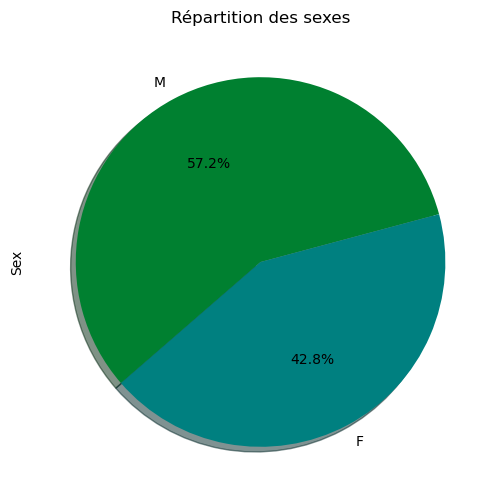

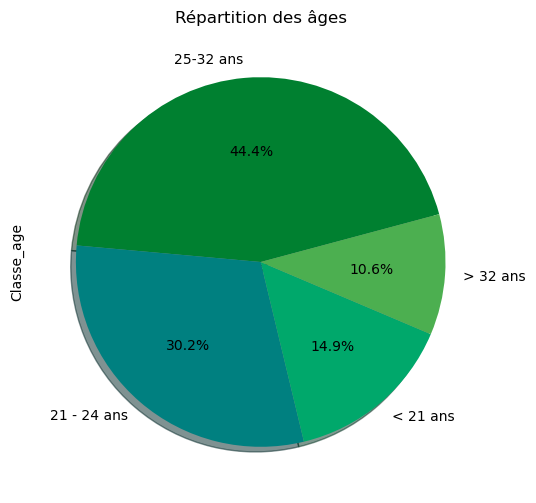

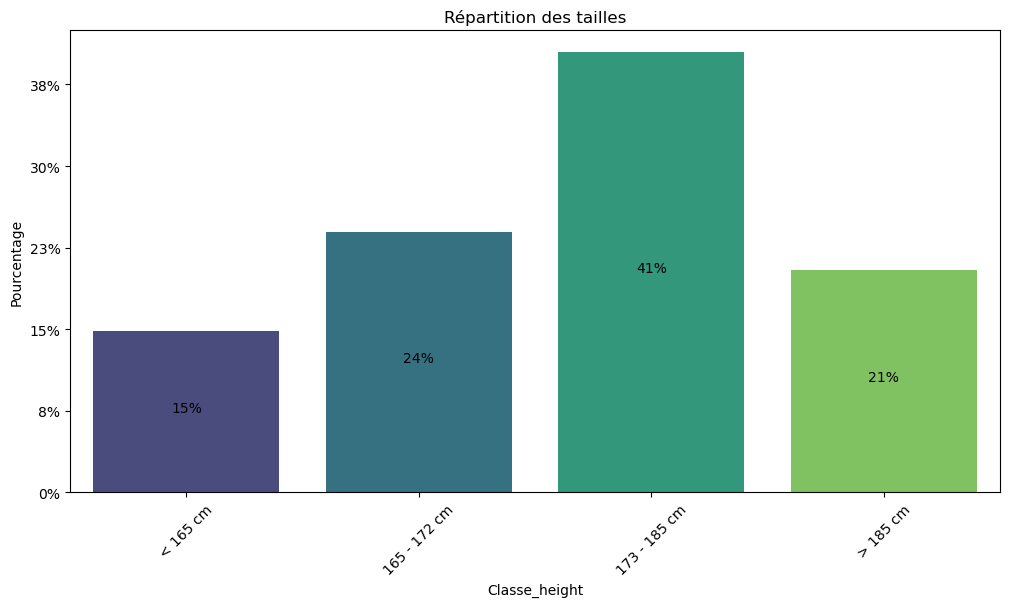

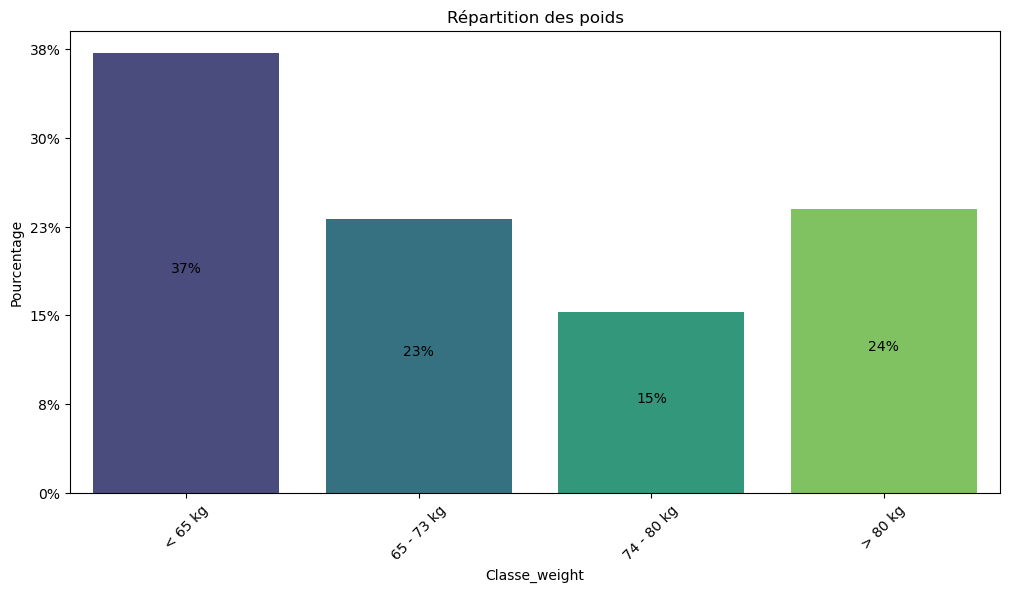

     NOC  Nombre d'individus
201  USA                3645
11   AUS                2963
73   GER                2760
161  RUS                2738
39   CHN                2635
69   GBR                2344
65   FRA                2312
94   ITA                2155
98   JPN                2038
34   CAN                2018
60   ESP                1909
27   BRA                1765
199  UKR                1611
103  KOR                1598
137  NED                1383
153  POL                1321


In [17]:
from mlops_functions.stats import plot_sex_pie_chart, plot_age_class_pie_chart, plot_count_percentage_bar_chart, plot_noc_distribution


plot_sex_pie_chart(base_summer_2000_net, 'Répartition des sexes')
plot_age_class_pie_chart(base_summer_2000_net, 'Répartition des âges')
plot_count_percentage_bar_chart(base_summer_2000_net, 'Classe_height', 'Répartition des tailles')
plot_count_percentage_bar_chart(base_summer_2000_net, 'Classe_weight', 'Répartition des poids')
plot_noc_distribution(base_summer_2000_net)


## statistique bivarié

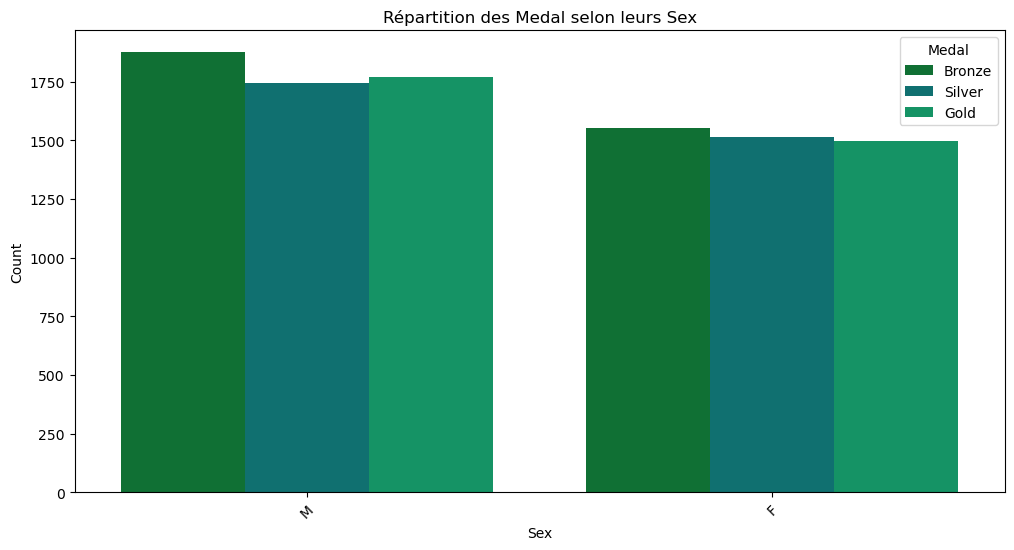

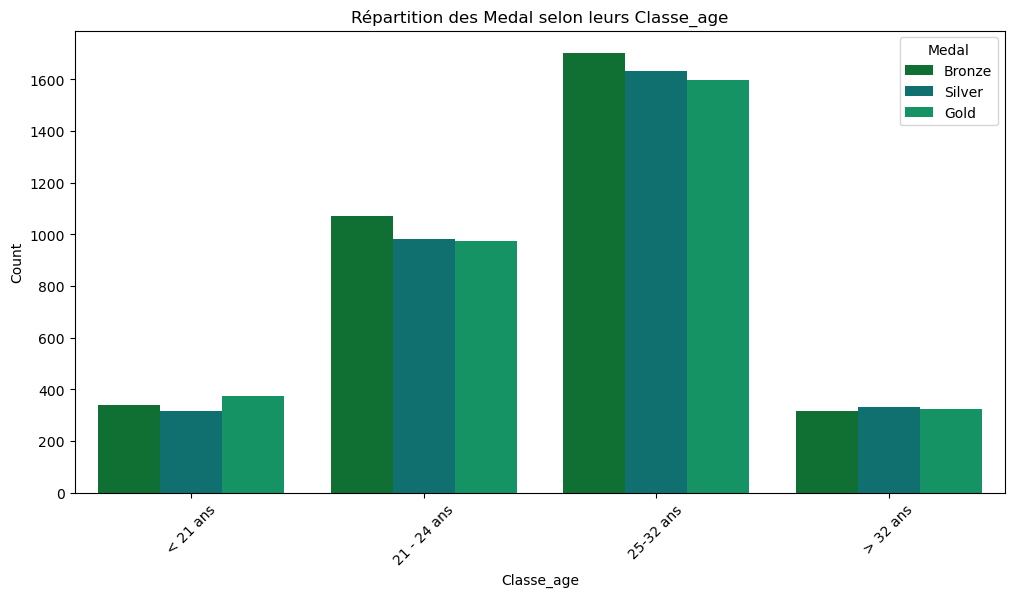

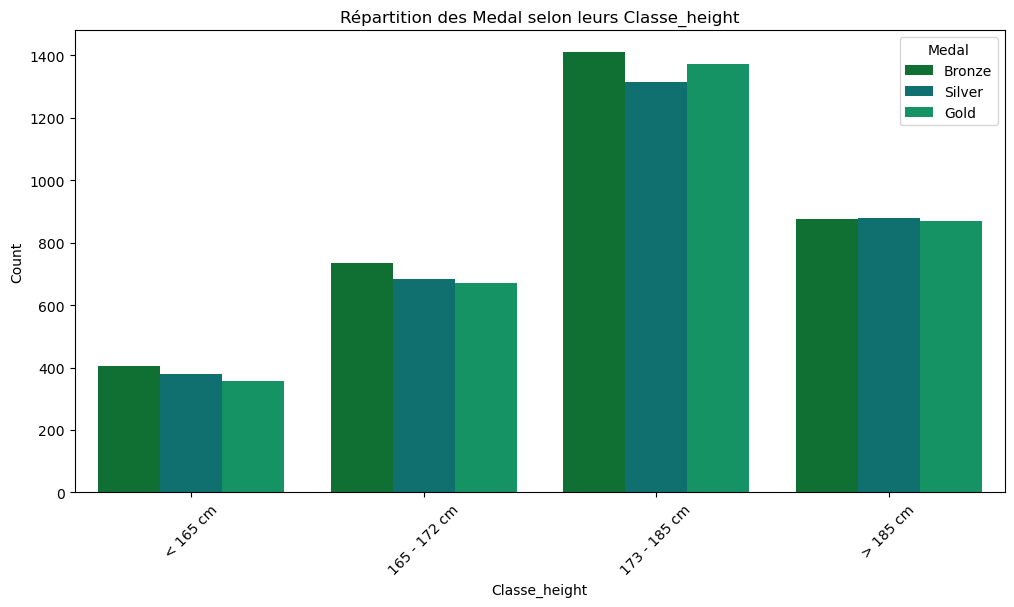

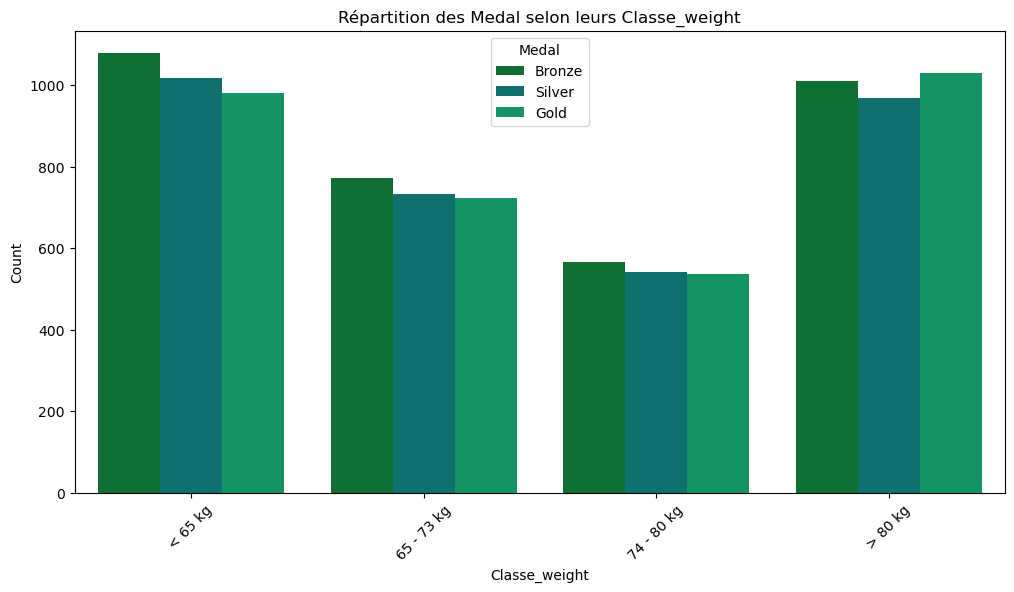

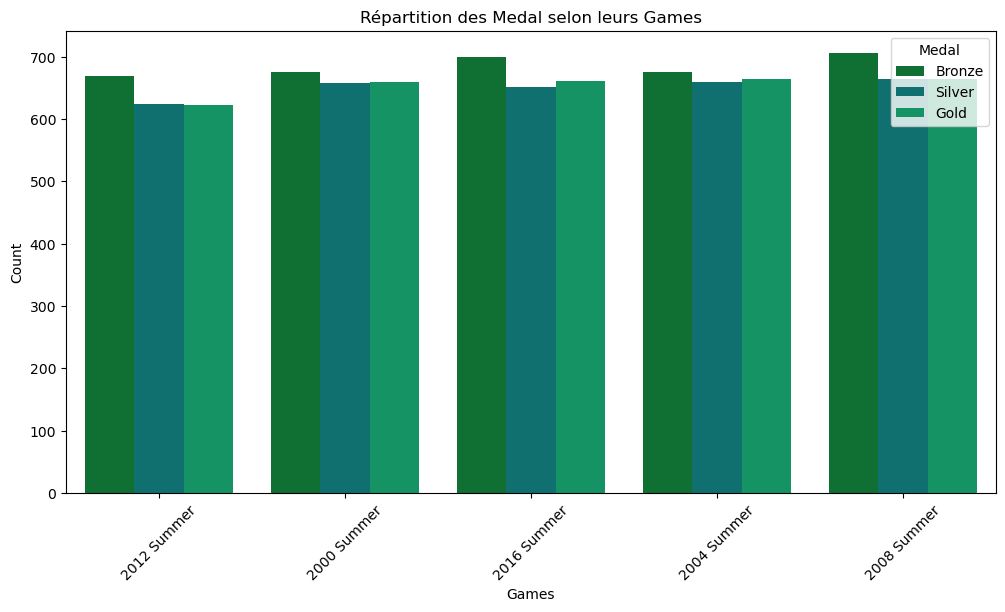

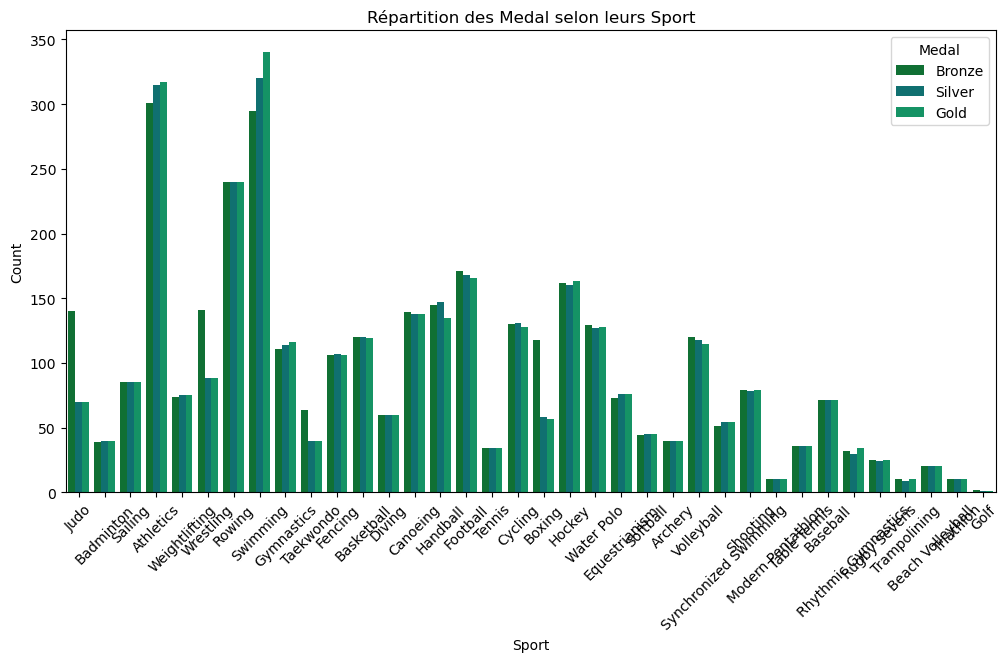

In [19]:
from mlops_functions.stats import create_bar_plot

create_bar_plot(base_summer_2000_net, 'Sex')
create_bar_plot(base_summer_2000_net, 'Classe_age')
create_bar_plot(base_summer_2000_net, 'Classe_height')
create_bar_plot(base_summer_2000_net, 'Classe_weight')
create_bar_plot(base_summer_2000_net, 'Games')
create_bar_plot(base_summer_2000_net, 'Sport')

# Corrélation entre les variables - V de Cramer

In [9]:
# Sélectionnez vos variables catégorielles
categorical_vars = ['Name', 'Sex', 'NOC', 'Games', 'City', 'Sport',
                    'Event', 'Medal', 'Classe_age', 'Classe_height', 'Classe_weight']

In [ ]:
# Cette fonction permet de calculer le tableau de contingenance. Au vu de nos données le résultat est long a sortir, donc nou conseillons de ne pas le lancer. 

from mlops_functions.functions import calculate_cramer_v, plot_cramer_matrix

# Calculez le V de Cramer et affichez la matrice de corrélation
# cramer_matrix = calculate_cramer_v(base_summer_2000_net, categorical_vars)
# plot_cramer_matrix(cramer_matrix)


# Faire de nouveaux regroupement et suppression des variables utilisées pour la suite de l'analyse

In [14]:
base_ACM = base_summer_2000_net

In [15]:
from mlops_functions.functions import transform_base_ACM

base_ACM = transform_base_ACM(base_summer_2000_net)

# Affichage des colonnes après transformation
print(base_ACM.columns)

/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/mlops_functions/functions.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sport'].replace({


Index(['Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Season', 'Sport',
       'Medal', 'Classe_age', 'Classe_height', 'Classe_weight'],
      dtype='object')


/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/mlops_functions/functions.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NOC'].replace({


In [17]:
#remplacer les valeurs manquantes de la variable cibe par "pas de médaille"
base_ACM['Medal'].fillna('Pas_de_médaille', inplace=True)
base_ACM.isnull().sum()

Sex              0
Age              0
Height           0
Weight           0
Team             0
NOC              0
Season           0
Sport            0
Medal            0
Classe_age       0
Classe_height    0
Classe_weight    0
dtype: int64

# ACM 

In [28]:
from mlops_functions.functions import analyze_acm

base_ACM = analyze_acm(base_ACM)
#remplacer les valeurs manquantes de la variable cibe par "pas de médaille"
#base_ACM['Medal'].fillna('Pas_de_médaille', inplace=True)
#print(base_ACM)


ValueError: Unknown label type: (array([23.0, 31.0, 34.0, ..., 24.0, 28.0, 33.0], dtype=object),)

In [ ]:
# pip install fanalysis
# utilisation du package fanalysis 

#acm = MCA()
#acm.fit(base_ACM.values)

In [ ]:
# afficher les valeurs propres 
#acm.eig_

In [24]:
#eigenvalues = acm.eig_

In [ ]:
# Obtenir les valeurs propres associées à chaque composante principale
#eigenvalues = acm.eig_

# Calculer le pourcentage de chaque valeur propre
#total_variance = sum(eigenvalues[0])
#percentage_var = [(value / total_variance) * 100 for value in eigenvalues[0]]

# Utiliser une palette de couleurs Seaborn et inverser l'ordre
#sns.set(style="whitegrid")
#palette = sns.color_palette("BuGn", len(percentage_var))
#palette = palette[::-1]  # Inverser l'ordre des couleurs

# Tracer le diagramme en barres des valeurs propres en pourcentage
#plt.figure(figsize=(10, 6))
#bars = plt.bar(range(1, len(percentage_var) + 1), percentage_var, color=palette, edgecolor='black')
#plt.xlabel('Composante Principale')
#plt.ylabel('Pourcentage de Variance Expliquée')
#plt.title('Diagramme en Barres des Valeurs Propres en Pourcentage - ACM')

# Définir les ticks de l'axe x avec des valeurs entières
#plt.xticks(range(1, len(percentage_var) + 1))

# Ajouter les étiquettes de valeur uniquement pour les deux premières barres
#for i, (bar, value) in enumerate(zip(bars, percentage_var)):
#    if i < 2:
#        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{value:.2f}%',
#                 ha='center', va='bottom', color='black', fontsize = 8)

#plt.show()

In [ ]:
# indormation que procure l'ACM 
#info_col = acm.col_topandas()
#info_col.columns

In [ ]:
# Coordonnée des modalité pour l'axe 1 et 2
#coord_col = info_col[['col_coord_dim1', 'col_coord_dim2']]
#print(coord_col)

In [ ]:
# Contribution des modalités pour l'axe 1 et 2
#contrib_col = pd.DataFrame(info_col[['col_contrib_dim1', 'col_contrib_dim2']])
#contrib_col

In [ ]:
#ACM -projection des colonnes
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(7, 7))
#ax.axis([-2.2, +2.2, -1.2, +1.5])
#ax.plot([-2.2, +2.2], [0, 0], color="silver", linestyle="--")
#ax.plot([0, 0], [-2.2, +2.2], color='silver', linestyle="--")
#ax.set_xlabel('Dim.1')
#ax.set_ylabel('Dim.2')
#plt.title("Modalité")

#for x, y, lbl in zip(coord_col.iloc[:, 0], coord_col.iloc[:, 1], coord_col.index):
#    ax.text(x, y, lbl, horizontalalignment='center', verticalalignment='center', fontsize=7)

#plt.show()


In [ ]:
#ACM -projection en couleur
#acm.mapping_col(num_x_axis = 1 , num_y_axis = 2)

# Modélisation

In [19]:
from mlops_functions.functions import preprocess_data

# Prétraiter et diviser les données
base_model = base_ACM
# Appel de la fonction en omettant cat_columns et preprocessor si vous ne les utilisez pas
X_train, X_test, y_train, y_test, cat_columns, preprocessor, X_train_encoded, X_test_encoded = preprocess_data(base_model)


Valeurs uniques avant la modification : ['Pas_de_médaille' 'medaille']
Valeurs uniques après la modification : ['Pas_de_médaille' 'medaille']


## Régression logistique

In [20]:
from mlops_functions.functions import train_and_evaluate_logistic_regression
LG = train_and_evaluate_logistic_regression(X_train_encoded, X_test_encoded, y_train, y_test)

Training score: 0.8503197893152746
Test score: 0.8507148231753198

Matrice de confusion (Training Data):
[[45180    14]
 [ 7943    23]]

Matrice de confusion (Test Data):
[[11299     0]
 [ 1984     7]]

Indicateurs de performance du modèle :
Sensibilité: 100.0
Spécificité: 0.0
Taux d'erreur alpha: 0.0
Taux d'erreur beta: 99.64841788046208
Taux d'erreur moyen: 15.0


## Random Forest 

In [21]:
from mlops_functions.functions import train_and_evaluate_random_forest
trained_model_RF = train_and_evaluate_random_forest(X_train_encoded, X_test_encoded, y_train, y_test)

Training score: 0.8556621519939804
Test score: 0.8483069977426636

Matrice de confusion (Training Data):
[[44925   269]
 [ 7404   562]]

Matrice de confusion (Test Data):
[[11169   130]
 [ 1886   105]]

Indicateurs de performance du modèle :
Sensibilité: 99.0
Spécificité: 5.0
Taux d'erreur alpha: 1.0
Taux d'erreur beta: 94.72626820693118
Taux d'erreur moyen: 15.0


# KNN

In [ ]:
from mlops_functions.functions import choose_k_and_evaluate_knn
trained_model_KNN = choose_k_and_evaluate_knn(X_train_encoded, X_test_encoded, y_train, y_test)

# interprétation du modèle Regression logisitique

In [27]:
from mlops_functions.functions import analyze_logistic_regression

interpret = analyze_logistic_regression(LG, preprocessor, X_train_encoded, cat_columns)

Sex_M: -0.3821596460438418
NOC_Amérique centrale: -1.4028067839357998
NOC_Amérique du Nord: 1.5911357501169574
NOC_Amérique du Sud: 0.6595164002565321
NOC_Asie: 0.9275493833816025
NOC_Europe: 0.9927737204408202
NOC_Océanie: 1.1072556469403028
Sport_Autres sports: 0.5010961375064007
Sport_Combat: 1.0172163536288208
Sport_Gymnastique: 0.34245635506077704
Sport_Natation: 0.49717364449519497
Sport_Raquette: 0.24878134756874953
Sport_Sport collectif: 1.3662183397379497
Sport_Sur l'eau: 0.9703382100683515
Classe_age_25-32 ans: 0.06664046364044363
Classe_age_< 21 ans: -0.2920695955533605
Classe_age_> 32 ans: -0.07828796338902172
Classe_height_173 - 185 cm: 0.1483253166188166
Classe_height_< 165 cm: -0.08023542945287718
Classe_height_> 185 cm: 0.30679711161467293
Classe_weight_74 - 80 kg: 0.12265830158533982
Classe_weight_< 65 kg: 0.04040074113015654
Classe_weight_> 80 kg: 0.1631149293330414
Intercept: [-3.43418429]
Sex_M: <0.001
NOC_Amérique centrale: <0.001
NOC_Amérique du Nord: <0.001
NOC_A